## EDA: Explanatory Data Analysis 

Pasos

- Encontrar patrones
- Identificar errores
- Plantear nuevas hipótesis o preguntas
- Identificar relaciones entre variables
- Empezar a encontrar respuestas a nuestras preguntas de investigación

In [141]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# data

df= pd.read_csv("df4.csv",sep=";")

df.head(3)


# Se observan algunos problemas
# Hay una columna con dos tipos de datos: Job y Education en jobedu

# Para el posterior analisis la columna customerid no sera necesaria

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [142]:
# Separacion de la columna jobedu 

df['job'] = df['jobedu'].apply(lambda x: x.split(",")[0])
df['education'] = df['jobedu'].apply(lambda x: x.split(",")[1])

In [144]:
# eliminacion de columna jobedu y customerid
df.drop('jobedu', axis = 1, inplace = True)
df.drop('customerid', axis = 1, inplace = True)
df.head(3)


# Finalmente la data esta en condiciones de ser analizada via EDA

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


## En busqueda NA

**Tres tipos de NA**
- **MCAR** : NA completamente aleatorio (no dependen de ninguna otra caracteristica).
- **MAR** : NA aleatorio (valores que pueden depender de algunas caracteristicas)
- **MNAR** : NA no aleatorio ( valores que tienen alguna justificación en su aparición)

In [145]:
# Chequeamos los NA

df.isnull().sum()

# En las variables Age (20), Month (50) y Response (30); presentan NA.

# Eliminamos los registros o los imputamos?

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [146]:
# podriamos elminar los registros NA de la variable Age y Response e imputar month, ya que la variable objetivo es Response.

# Eliminacion de NA en Age y Response
df = df[~df.age.isnull()].copy()
df = df[~df.response.isnull()].copy()

# verificacion
df.isnull().sum()

# como la variable objetivo es response, no es aconsejable imputarla ya que tendriamos que justificar fuertemente esa modificacion a la variable.

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
dtype: int64

In [147]:
# En la variable month se imputará por la Moda

# Encontramos la moda de la variable month
moda_month = df.month.mode()[0]

# Imputamos con la moda encontrada
df.month.fillna(moda_month, inplace = True)

# verificacion
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Análisis estadístico

#### **Outlier**

**Dos Tipos**

- **Univariados** : datos cuyos valores se encuentran más allá del rango de valores esperados en función de una variable.
- **Multivariados** : algunos valores de una variable pueden no estar más allá del rango esperado, pero cuando grafica los datos con alguna otra variable, estos valores pueden estar lejos del valor esperado.

Para realizar un análisis de datos en un conjunto de valores, debemos asegurarnos de que los valores en la misma columna estén en la misma escala. Por ejemplo, si los datos contienen los valores de la velocidad máxima de los automóviles de diferentes compañías, entonces toda la columna debe estar en una escala de metros/seg o una escala de millas/seg.


### Univariado Categorico variable job

In [148]:
# Calculo de porcentaje de cada categoria dentro de job
df.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

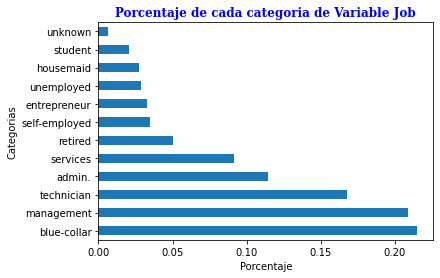

In [149]:
# grafico 
df.job.value_counts(normalize=True).plot.barh()
plt.title("Porcentaje de cada categoria de Variable Job", 
          fontdict={'family': 'serif', 
                    'color' : 'blue',
                    'weight': 'bold',
                    'size': 12})
plt.xlabel("Porcentaje", size = 10,)
plt.ylabel("Categorias", size = 10)
plt.show()

# Segun los resultados, la categoria que contiene mas trabajadores es blue-collar.

### Univariada variable categorica ordinal

In [150]:
# Education y Month

# Calculamos el porcentaje de los niveles para education
df.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

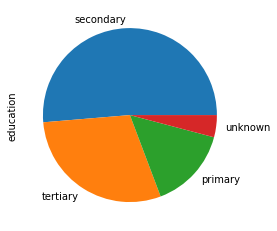

In [152]:
# grafico
df.education.value_counts(normalize=True).plot.pie()
plt.show()

# de acuerdo a los resultados, la mayoria de los trabajadores tienen nivel secundario en education

### Univariado análisis variable continua

In [13]:
df.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

### Bivariado analisis

- **Analisis numerica-numerica**: 
       - Scatter Pplot
       - Pair Plot
       - Correlation matrix
       
       
Variables a utilizar **Age**, **Balance** y **Salary**.

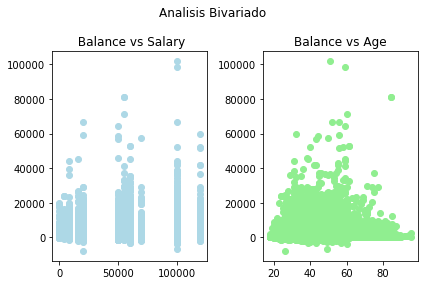

In [153]:
fig, axs = plt.subplots(1,2)
fig.suptitle('Analisis Bivariado')
axs[0].scatter(df.salary,df.balance,c="lightblue")
axs[0].set_title(" Balance vs Salary")
axs[1].scatter(df.age,df.balance,c="lightgreen")
axs[1].set_title("Balance vs Age")
plt.rcParams["figure.figsize"] = (10, 4)

fig.tight_layout()


### Utilización Pair Plot para las 3 variables

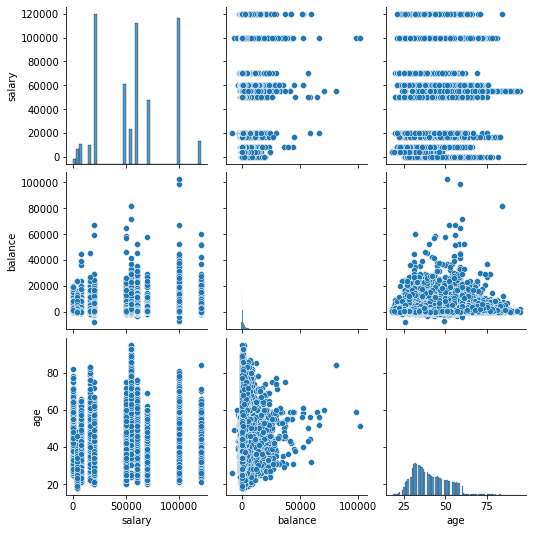

In [154]:
sns.pairplot(data=df, vars=['salary','balance','age'])
plt.show()
# es dificil observar la relacion entre variables numericas en un simple grafico.

### Correlacion

In [155]:
# generacion de la matrix
df[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


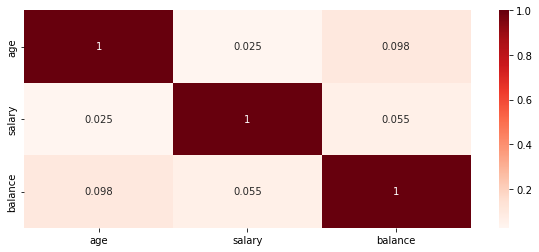

In [156]:
# grafico de correlacion
sns.heatmap(df[['age','salary','balance']].corr(), annot=True, cmap="Reds")
plt.show()

# Se observa pequeñas correlacion entre variables. Por ejemplo, la correlacion mas alta 
# produce entre balance y age, con una correlacion del 0.098.-

### Análisis Numerico-Categorico

In [157]:
# Se utilizará la media, mediana con ayuda de funciones y graficos.

# Analisis de response y salary

# Primeramente se conocen la media de cada categoria de response.

media = df.groupby('response')['salary'].mean()
print(media)
# Se observan ambas medias muy cercanas, lo que implica que no hay diferencias entre las 
# categorias utilizando el salary como diferenciador.

# Que sucede con la mediana?
mediana = df.groupby('response')['salary'].median()
print(mediana)
# son iguales, por tanto, ambas medidas no son suficiente.

# Es necesario la ayuda de un grafico

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64
response
no     60000.0
yes    60000.0
Name: salary, dtype: float64


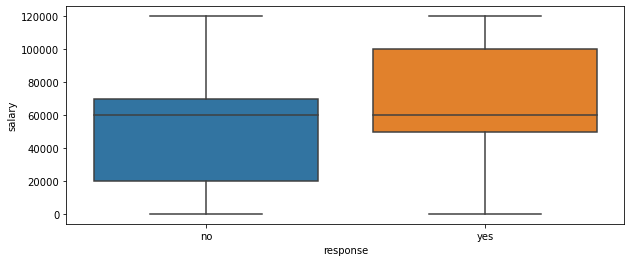

In [158]:
#
sns.boxplot(df.response,df.salary)
plt.show()

# Se observa que existen diferencias entre clases. Los salarios de la categoria yes, son 
# mas altos que los de la categoria no.


### Analisis Categorica-Categorica

Dado que nuestra variable objetivo es la tasa de Respuesta, veremos cómo las diferentes categorías como Educación, Estado Civil, etc., están asociadas con la columna de Respuesta. 
Entonces, en lugar de 'Sí' y 'No', los convertiremos en '1' y '0', al hacer eso obtendremos la "Tasa de respuesta".

In [159]:
# transformamos response
df['response_rate'] = np.where(df.response == 'yes',1,0)

# contamos 
df.response_rate.value_counts()

0    39876
1     5285
Name: response_rate, dtype: int64

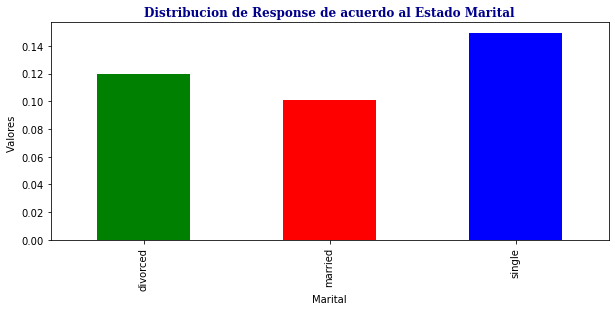

In [160]:
# Como varía la tasa de response de acuerdo al estado civil
coloresMedallas = ['green','red','blue']
df.groupby('marital')['response_rate'].mean().plot(kind='bar',color=coloresMedallas)
plt.xlabel("Marital", size = 10,)
plt.ylabel("Valores ", size = 10)
plt.title("Distribucion de Response de acuerdo al Estado Marital", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 12})
plt.show()

# este grafico demuestra la distribucion de la variable response (respondieron que si)
# de acuerdo al estado marital. La mayoria que respondio que si es soltero.

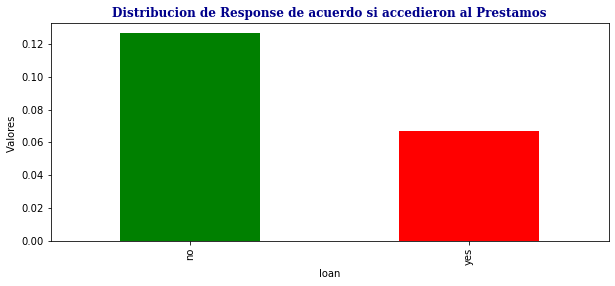

In [176]:
# Que sucede con la variable loan
coloresMedallas = ['green','red','#8C7858']
plt.xlabel("loan", size = 10,)
plt.ylabel("Valores ", size = 10)
plt.title("Distribucion de Response de acuerdo si accedieron al Prestamos", 
          fontdict={'family': 'serif', 
                    'color' : 'darkblue',
                    'weight': 'bold',
                    'size': 12})
df.groupby('loan')['response_rate'].mean().plot(kind='bar',color=coloresMedallas)
plt.show()



## Análisis Multivariado

Veamos cómo 'Educación', 'Marital' y 'Response_rate' varían entre sí.

Primero, crearemos una tabla dinámica con las tres columnas y luego, crearemos un heatmap.

marital    divorced   married    single
education                              
primary    0.138852  0.075601  0.106808
secondary  0.103559  0.094650  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


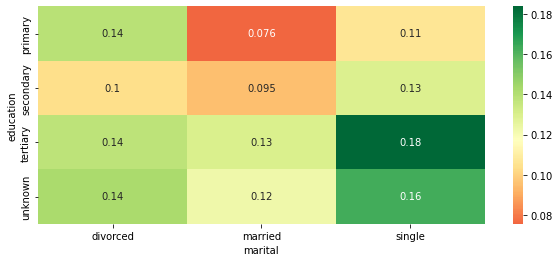

In [170]:
# tabla dinamica
resultado = pd.pivot_table(data=df, index='education', 
                           columns='marital',values='response_rate')
print(resultado)

# heat map

sns.heatmap(result,annot=True,cmap='RdYlGn', center = 0.117)
plt.show()




job          admin.  blue-collar  entrepreneur  housemaid  management  \
education                                                               
primary    0.057416     0.058149      0.065574   0.078275    0.074830   
secondary  0.118889     0.080633      0.096296   0.083756    0.086607   
tertiary   0.173380     0.161074      0.075912   0.127168    0.145459   
unknown    0.105263     0.072687      0.092105   0.088889    0.199170   

job         retired  self-employed  services   student  technician  \
education                                                            
primary    0.223899       0.038462  0.084302  0.363636    0.082278   
secondary  0.210580       0.074653  0.085723  0.297244    0.099177   
tertiary   0.273973       0.160434  0.124378  0.264574    0.145473   
unknown    0.252101       0.128205  0.126667  0.263804    0.095041   

job        unemployed   unknown  
education                        
primary      0.132812  0.058824  
secondary    0.148352  0.126761  
tert

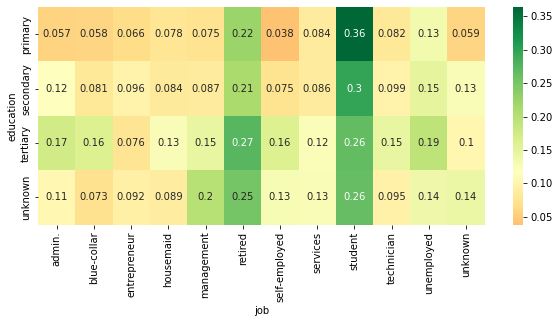

In [173]:
# tabla dinamica 2
resultado2 = pd.pivot_table(data=df, index='education', 
                           columns='job',values='response_rate')
print(resultado2)

# heat map

sns.heatmap(resultado2,annot=True,cmap='RdYlGn', center = 0.117)
plt.show()

### Conclusiones preliminares

- Las personas casadas con educación primaria tienen menos probabilidades de responder positivamente a la encuesta.
- Las personas solteras con educacion terciaria tienen mayores probabilidades de responder positivamente a la encuesta.
- Los estudiantes que estan en primaria tienen mayores probabilidades de responder positivamente a la encuesta.
- Los trabajadores particulares con educacion primaria tienen menos probabilidades de responder positivamente a la encuesta.
